Importando bibliotecas.
Importing libraries.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Lendo o arquivo com os dados.
Reading the file with the data.

In [43]:
df = pd.read_csv("../Base/customer_support_tickets.csv")

Estes dados foram pegos do site Kaggle, para uso em testes, eles representam os chamados abertos no suporte ao cliente.

This data was taken from the Kaggle website, for use in tests, they represent open customer support tickets.

Observando as informações.
Watching the information.

In [44]:
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


Pegando informações das colunas e dos dados.
Getting information from columns and data.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

Com estes dados iniciais, vamos buscar transformá-los em informações que possam ser úteis, coluna por coluna.

With this initial data, we will try to transform it into information that may be useful, column by column.

1 - Ticket ID - Iremos pular essa coluna por não termos margem para buscar informações além da indentificação do caso e quantidade de tickets.

1 - Ticket ID - We will skip this column because we do not have margin to search for information beyond the identification of the case and number of tickets.

2 - Customer Name - O que podemos buscar para esta coluna seria a brincadeira de verificar os nomes mais comuns, porém, nenhum dado relevante para o negócio. (Não iremos buscar por tickets abertos pelo mesmo cliente utilizando o nome devido aos possíveis homônimos)

2 - Customer Name - What we can look for for this column would be the joke of checking the most common names, however, no relevant data for the business. (We will not search for tickets opened by the same customer using the name due to possible homonyms)

In [46]:
temp_customer_first_name = []
temp_customer_last_name = []

for x in range(len(df)):
    for i in range(len(df["Customer Name"].loc[x])):
        if df["Customer Name"].loc[x][i] == " ":
            temp_customer_first_name.append(str(df["Customer Name"].loc[x][:i]))
            temp_customer_last_name.append(str(df["Customer Name"].loc[x][(i+1):]))
            break

Importando a classe 'Counter' da biblioteca 'collections' para realizar a contagem da lista de forma eficiente.

Importing the 'Counter' class from the 'collections' library to perform list counting efficiently.

In [47]:
from collections import Counter

In [48]:
counter = Counter(temp_customer_first_name)
counter_filter = {first_name: qty for first_name, qty in counter.items() if qty > 1}
df_first_name = pd.DataFrame(list(counter_filter.items()), columns = ["First Name", "Quantity"])
df_first_name.sort_values(by = "Quantity", ascending = False, inplace = True)
df_first_name.reset_index(drop = True, inplace = True)
df_first_name.head()

,First Name,Quantity
0,Michael,181
1,David,141
2,Jennifer,125
3,James,118
4,Robert,112


In [49]:
counter = Counter(temp_customer_last_name)
counter_filter = {last_name: qty for last_name, qty in counter.items() if qty > 1}
df_last_name = pd.DataFrame(list(counter_filter.items()), columns = ["Last Name", "Quantity"])
df_last_name.sort_values(by = "Quantity", ascending = False, inplace = True)
df_last_name.reset_index(drop = True, inplace = True)
df_last_name.head()

,Last Name,Quantity
0,Smith,183
1,Johnson,135
2,Brown,110
3,Williams,106
4,Jones,106


Podemos perceber que o nome os 3 primeiros nomes mais comuns nessa base de dados são: 'Michael', 'David' e 'Jennifer' e os 3 sobrenomes mais comuns são: 'Smith', 'Johnson' e 'Brown'.

We can see that the 3 most common first names in this database are: 'Michael', 'David' and 'Jennifer' and the 3 most common last names are: 'Smith', 'Johnson' and 'Brown'.

3 - Customer Email - Aqui podemos identificar se um mesmo usuário abriu mais de 1 ticket, podendo gerar insatisfação e possível perda do cliente bem como novos clientes através deste.

3 - Customer Email - Here we can identify if the same user has opened more than 1 ticket, which may lead to dissatisfaction and possible loss of the customer as well as new customers through this first one.

In [50]:
df_email_count = df.groupby("Customer Email")["Customer Email"].count()
df_email_count = df_email_count[df_email_count > 1]
df_email_count.sort_values(ascending = False)

Customer Email
asmith@example.com           4
bsmith@example.com           4
asmith@example.org           3
rodriguezeric@example.net    3
hsmith@example.org           3
                            ..
ijackson@example.org         2
iananderson@example.net      2
hyoung@example.org           2
hflynn@example.net           2
zwilliams@example.com        2
Name: Customer Email, Length: 139, dtype: int64

Aqui podemos observar que 139 clientes abriram mais de 1 ticket, podemos gerar um dataframe para verificá-los mais de perto e realizar uma tratativa de retenção de clientes.

Here we can see that 139 customers opened more than 1 ticket, we can generate a dataframe to check them more closely and carry out customer retention procedures.

04 - Customer Age - Aqui podemos identificar da nossa base de clientes, quais faixa de idades mais realizam aberturas de tickets e realizar textos/imagens instrutivos na página de suporte direcionados para esta faixa de idade.

04 - Customer Age - Here we can identify from our customer base, which age group opens tickets the most and create instructional texts/images on the support page aimed at this age group.

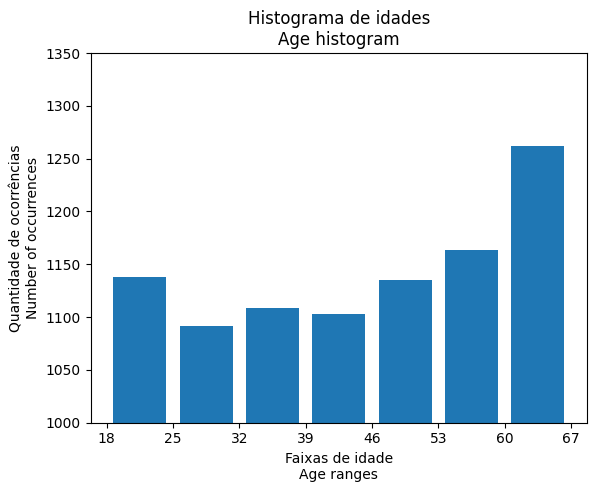

In [51]:
bins = range(18, 70, 7)
plt.hist("Customer Age", data = df, bins = bins, rwidth = 0.8)
plt.title("Histograma de idades\nAge histogram")
plt.ylabel("Quantidade de ocorrências\nNumber of occurrences")
plt.ylim(1000, 1350)
plt.xlabel("Faixas de idade\nAge ranges")
plt.xticks(bins)
plt.show()

05 - Customer Gender - Aqui somente podemos observar os gêneros que mais abriram tickets, mas também não temos informações relevantes para o negócio.

05 - Customer Gender - Here we can only observe the genders that opened the most tickets, but we also don't have relevant information for the business.

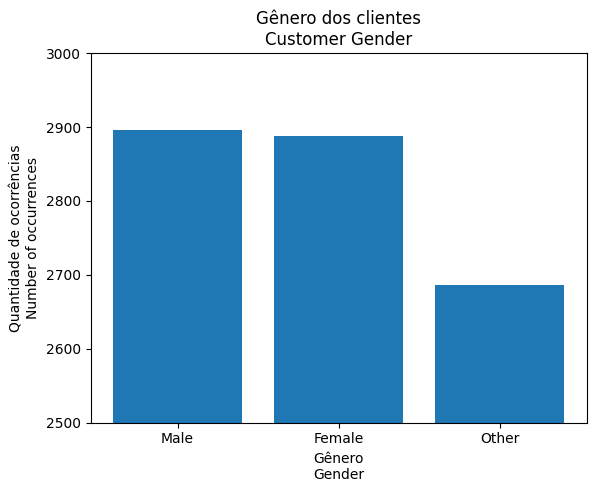

In [52]:
gender_count = df["Customer Gender"].value_counts()

plt.bar(gender_count.index, gender_count.values)
plt.title("Gênero dos clientes\nCustomer Gender")
plt.ylabel("Quantidade de ocorrências\nNumber of occurrences")
plt.ylim(2500, 3000)
plt.xlabel("Gênero\nGender")
plt.show()

06 - Product Purchased - Aqui podemos identificar os produtos comprados que mais tiveram tickets abertos e em conjunto com a coluna do tipo, assunto e descrição, poderemos elaborar um plano de ação para o produto, neste momento iremos mostrar somente os dados do produto e mais abaixo realizamos a análise do conjunto.

06 - Product Purchased - Here we can identify the purchased products that had the most open tickets and together with the type, subject and description column, we can develop an action plan for the product, at this moment we will only show the product data and below we carry out the analysis of the set.

In [53]:
df_products = df.groupby("Product Purchased")["Product Purchased"].count().sort_values(ascending = False)
df_products

Product Purchased
Canon EOS                         240
GoPro Hero                        228
Nest Thermostat                   225
Philips Hue Lights                221
Amazon Echo                       221
LG Smart TV                       219
Sony Xperia                       217
Roomba Robot Vacuum               216
Apple AirPods                     213
LG OLED                           213
iPhone                            212
Sony 4K HDR TV                    210
Garmin Forerunner                 208
LG Washing Machine                208
Canon DSLR Camera                 206
Nikon D                           204
Google Pixel                      203
Nintendo Switch Pro Controller    203
Sony PlayStation                  202
Fitbit Charge                     202
Microsoft Office                  200
HP Pavilion                       200
Dyson Vacuum Cleaner              198
Amazon Kindle                     198
Google Nest                       198
Bose SoundLink Speaker          

Com essa informação, podemos tratar cada produto de acordo com as colunas de tipo, assunto e descrição, conforme falado anteriormente, seguindo a ordem de mais reclamações. Como podemos observar, esse dataframe tem os dados muito normalizados, ou seja, em um cenário real, a quantidade de produtos não é tão próxima assim, dessa forma, quando formos realizar as análises, pegaremos apenas os 3 produtos mais comprados.

With this information, we can treat each product according to the type, subject and description columns, as mentioned above, following the order of the most complaints. As we can see, this dataframe has very normalized data, that is, in a real scenario, the number of products is not that close, so when we carry out the analysys, we will only pick the 3 most purchased products.

07 - Date of Purchase - Aqui podemos identificar as datas que os produtos foram comprados. Podemos verificar através das datas os lotes dos produtos, visto que não possui essa informação no sistema e/ou observar o atendimento realizado no dia caso o chamado foi aberto devido a ele.

07 - Date of Purchase - Here we can identify the dates that the products were purchased. We can check the batches of products through the dates, since this information is not available in the system and/or observe the service performed on the day if the ticket was opened due to it.

Antes de criarmos o gráfico, precisamos transformar a coluna em datetime para o python poder reconhecê-lo como data ao invés de string.

Before we create the chart, we need to transform the column into datetime so that python can recognize it as a date instead of a string.

In [54]:
df["Date of Purchase"] = df["Date of Purchase"].astype("datetime64[ns]")

Agora podemos criar o gráfico mostrando os meses com maior ocorrência de chamados.

Now we can create the graph showing the months with the highest number of tickets.

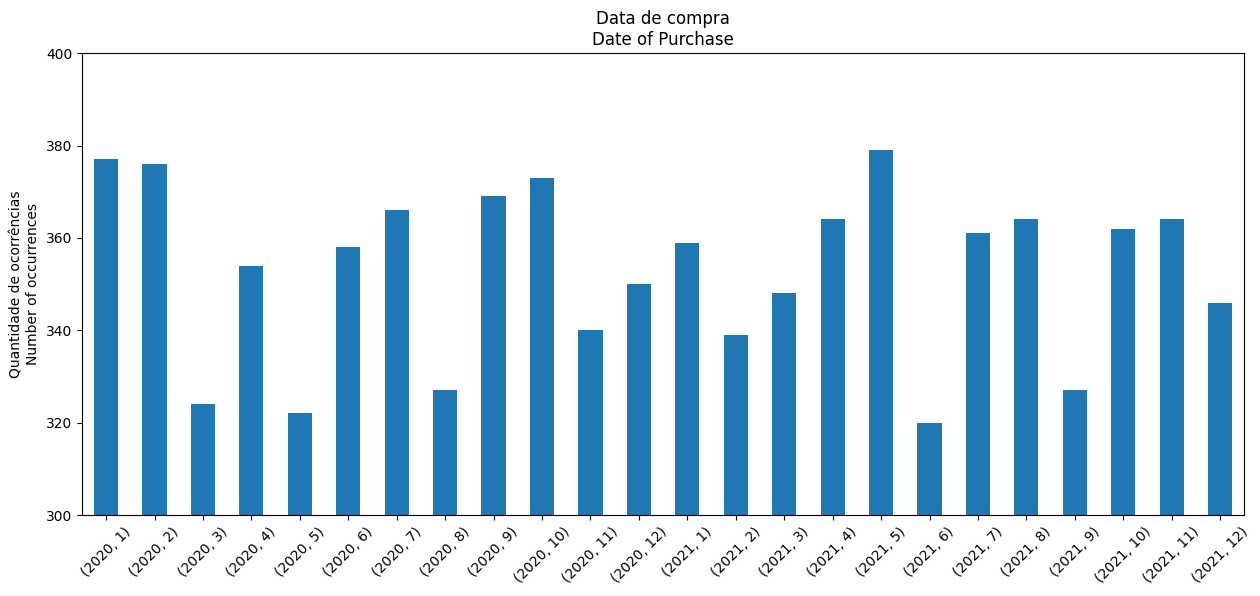

In [55]:
date_purchase_count = df.groupby([df["Date of Purchase"].dt.year, df["Date of Purchase"].dt.month])["Date of Purchase"].count()

plt.figure(figsize=(15,6))

ax = date_purchase_count.plot(kind="bar")

plt.title("Data de compra\nDate of Purchase")
plt.ylabel("Quantidade de ocorrências\nNumber of occurrences")
plt.ylim(300, 400)
plt.xlabel("")
plt.xticks(rotation=45)

plt.show()

Nós também podemos ordenar os meses com maior ocorrências, conforme abaixo.

We can also order the months with the most occurrences, as below.

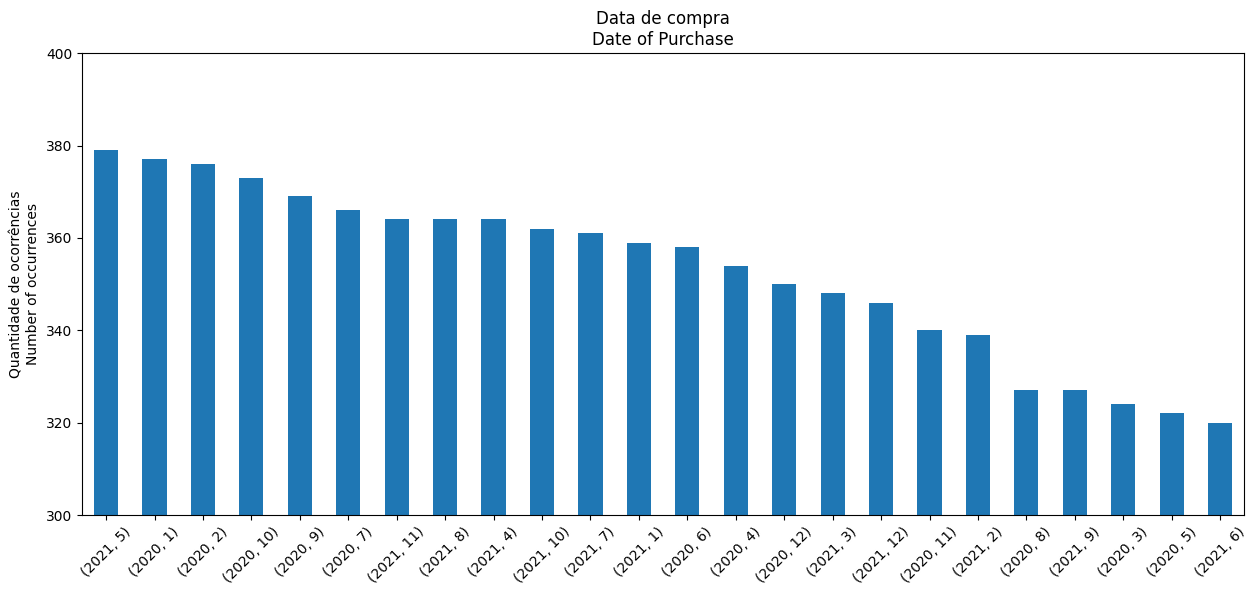

In [56]:
date_purchase_count = df.groupby([df["Date of Purchase"].dt.year, df["Date of Purchase"].dt.month])["Date of Purchase"].count()

sorted_date_purchased_count = date_purchase_count.sort_values(ascending=False)

plt.figure(figsize=(15,6))

ax = sorted_date_purchased_count.plot(kind="bar")

plt.title("Data de compra\nDate of Purchase")
plt.ylabel("Quantidade de ocorrências\nNumber of occurrences")
plt.ylim(300, 400)

plt.xticks(rotation=45)

plt.xlabel("")

plt.show()

08 - Ticket Type - Aqui podemos identificar os tipos de chamados abertos, assim podemos também mapear as áreas com maiores problemas, seja produto ou sistema.

08 - Ticket Type - Here we can identify the types of open tickets, so we can also map the areas with the biggest problems, whether product or system.

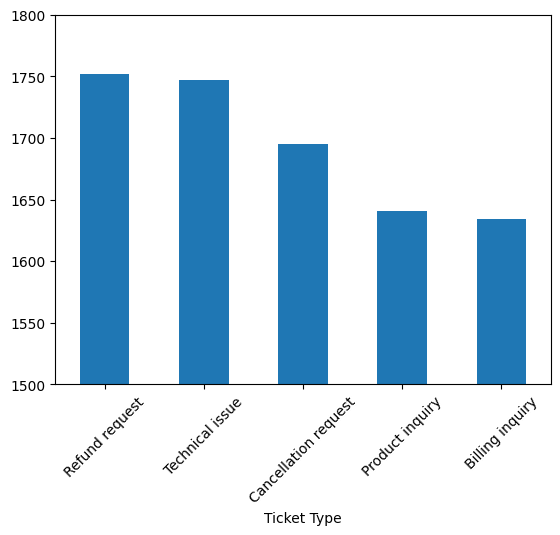

In [57]:
ticket_type_group = df.groupby("Ticket Type")["Ticket Type"].count()

sorted_ticket_type_group = ticket_type_group.sort_values(ascending=False)

sorted_ticket_type_group.plot(kind="bar")

plt.ylim(1500, 1800)
plt.xticks(rotation=45)

plt.show()

Aqui podemos montar um agrupamento para verificar as quantidades de chamados por tipo de produto.

Here we may set up a grouping to check the amounts of tickets by type of product.

In [58]:
ticket_type_group2 = df.groupby(["Product Purchased","Ticket Type"]).size().reset_index(name='QT Tickets')
ticket_type_group2

,Product Purchased,Ticket Type,QT Tickets
0,Adobe Photoshop,Billing inquiry,38
1,Adobe Photoshop,Cancellation request,39
2,Adobe Photoshop,Product inquiry,33
3,Adobe Photoshop,Refund request,35
4,Adobe Photoshop,Technical issue,36
...,...,...,...
205,iPhone,Billing inquiry,51
206,iPhone,Cancellation request,45
207,iPhone,Product inquiry,31
208,iPhone,Refund request,42


Vamos escolher por exemplo o produto Iphone.

Let's choose for example the product Iphone.

In [59]:
Iphone_ticket = ticket_type_group2.loc[ticket_type_group2["Product Purchased"] == "iPhone"]
Iphone_ticket

,Product Purchased,Ticket Type,QT Tickets
205,iPhone,Billing inquiry,51
206,iPhone,Cancellation request,45
207,iPhone,Product inquiry,31
208,iPhone,Refund request,42
209,iPhone,Technical issue,43


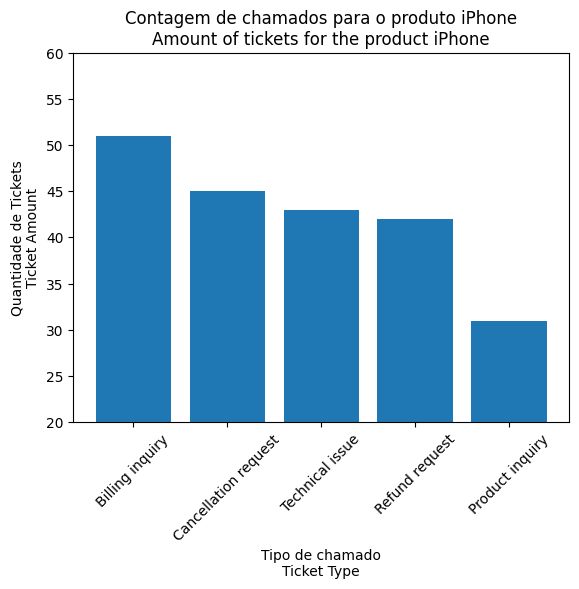

In [60]:
Iphone_ticket2 = Iphone_ticket.sort_values(by='QT Tickets', ascending=False)

plt.bar(Iphone_ticket2['Ticket Type'], Iphone_ticket2['QT Tickets'])
plt.title('Contagem de chamados para o produto iPhone\nAmount of tickets for the product iPhone')
plt.xlabel('Tipo de chamado\nTicket Type')
plt.ylabel('Quantidade de Tickets\nTicket Amount')
plt.ylim(20,60)
plt.xticks(rotation=45)

plt.show()

Aqui vemos as maiores quantidades de chamados para o produto selecionado e podemos realizar um plano de ação com essa informação.

Here we see the highest amount of tickets for the selected product and we can realize a action plan with this information.

09 - Ticket Subject - Aqui podemos ampliar uma visão dos chamados para sermos mais específicos nas tratativas.

09 - Ticket Subject - Here we can expand a view of the tickets to be more specific in the dealings.

Vamos continuar usando o produto iPhone para trazer essa visão, vamos refazer o agrupamento filtrando somente ele.

Let's continue to use the product iPhone to bring this vision, let's redo the grouping filtering only him.

In [61]:
df_iphone = df[df["Product Purchased"] == "iPhone"]
df_iphone.reset_index(drop = True, inplace = True)

ticket_subtype_group = df_iphone.groupby(["Ticket Type", "Ticket Subject"]).size().reset_index(name='QT SubTickets')

ticket_subtype_group

,Ticket Type,Ticket Subject,QT SubTickets
0,Billing inquiry,Account access,2
1,Billing inquiry,Battery life,2
2,Billing inquiry,Cancellation request,6
3,Billing inquiry,Delivery problem,2
4,Billing inquiry,Display issue,3
...,...,...,...
69,Technical issue,Product compatibility,5
70,Technical issue,Product recommendation,1
71,Technical issue,Product setup,1
72,Technical issue,Refund request,3


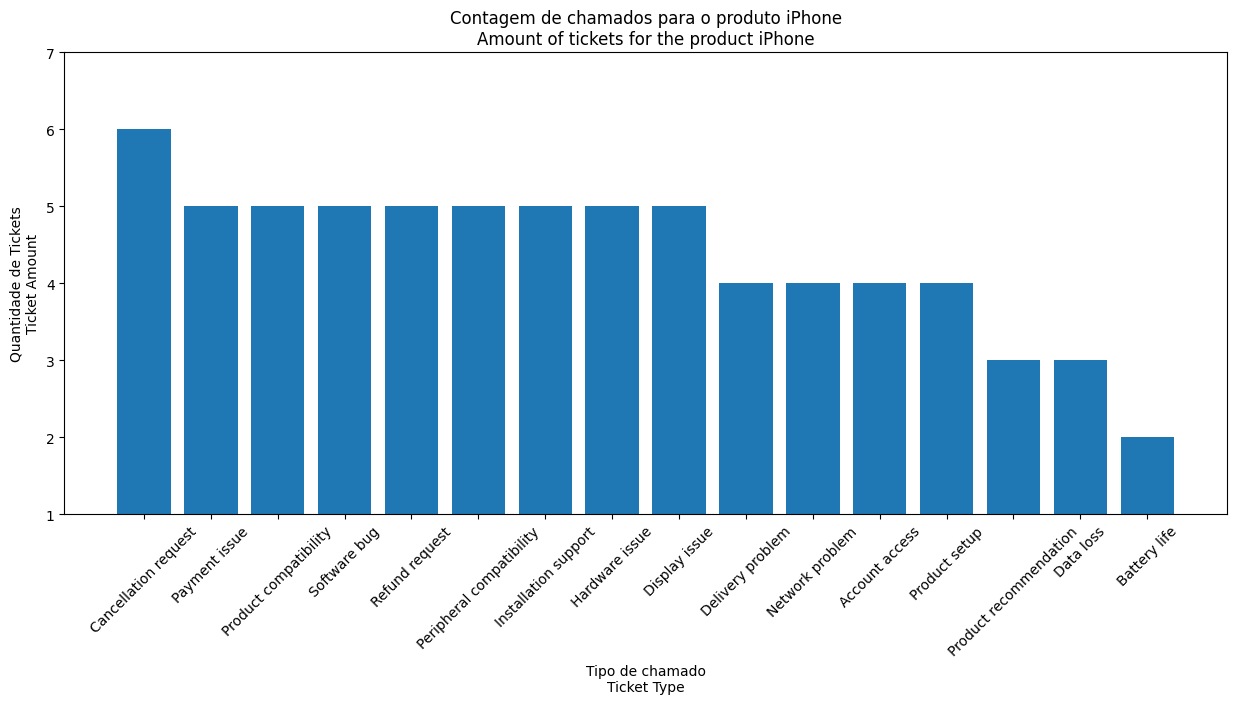

In [62]:
ticket_subtype_group2 = ticket_subtype_group.sort_values(by='QT SubTickets', ascending=False)

plt.figure(figsize=(15,6))

plt.bar(ticket_subtype_group2['Ticket Subject'], ticket_subtype_group2['QT SubTickets'])
plt.title('Contagem de chamados para o produto iPhone\nAmount of tickets for the product iPhone')
plt.xlabel('Tipo de chamado\nTicket Type')
plt.ylabel('Quantidade de Tickets\nTicket Amount')
plt.ylim(1,7)
plt.xticks(rotation=45)

plt.show()

Vamos ampliar agora para um tipo de chamado mais específico, vamos usar de exemplo os relacionados a pagamentos (Billing inquiry).

Let's expand now to a type of ticket more specific, let's use by example the ones related to the payments (Billing inquiry).

In [63]:
ticket_subtype_group3 = ticket_subtype_group2.loc[ticket_subtype_group2["Ticket Type"] == "Billing inquiry"]
ticket_subtype_group3

,Ticket Type,Ticket Subject,QT SubTickets
2,Billing inquiry,Cancellation request,6
14,Billing inquiry,Software bug,5
13,Billing inquiry,Refund request,5
6,Billing inquiry,Installation support,5
5,Billing inquiry,Hardware issue,5
10,Billing inquiry,Product compatibility,4
12,Billing inquiry,Product setup,4
9,Billing inquiry,Peripheral compatibility,3
4,Billing inquiry,Display issue,3
0,Billing inquiry,Account access,2


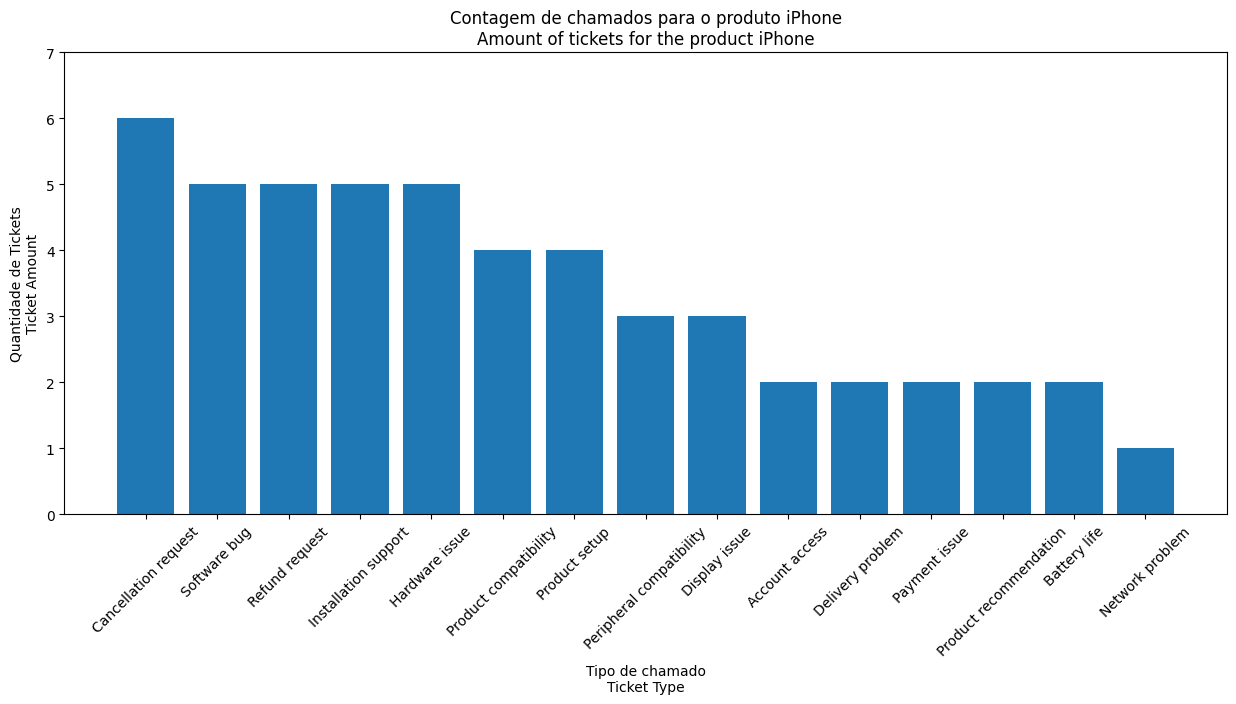

In [64]:
plt.figure(figsize=(15,6))

plt.bar(ticket_subtype_group3['Ticket Subject'], ticket_subtype_group3['QT SubTickets'])
plt.title('Contagem de chamados para o produto iPhone\nAmount of tickets for the product iPhone')
plt.xlabel('Tipo de chamado\nTicket Type')
plt.ylabel('Quantidade de Tickets\nTicket Amount')
plt.ylim(0,7)
plt.xticks(rotation=45)

plt.show()

Podemos agora através dessa visão, atuar mais especificamente nesses chamados.

We can now through this vision, act more specific on these tickets.

10 - Ticket Description - Aqui podemos criar uma nuvem de palavras e identificar dentre as descrições o que os clientes mais estão reclamando.

10 - Ticket Description - Here we can create a word cloud to identify among the description what customers are most complaining about.

Primeiro, vamos importar a biblioteca que irá nos ajudar.

Fist, let's import the lib that will help us.

In [65]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Depois, vamos normalizar as palavras para não haver maiúsculas.

Then, let's normalize the words so they don't capitalize;

In [66]:
word_string = " ".join(df["Ticket Description"].str.lower())

Agora vamos criar o gráfico com a nuvem de palavras.

Now let's create the graph with the word cloud.

(-0.5, 1599.5, 799.5, -0.5)

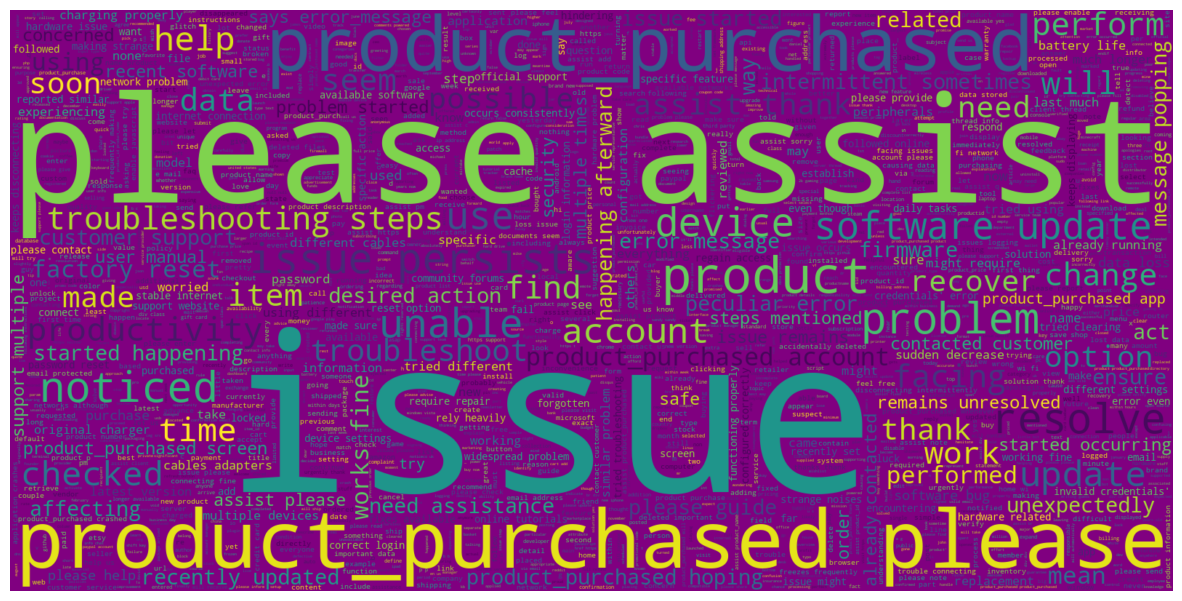

In [67]:
plt.figure(figsize = (15,15))
wc = WordCloud(background_color = "purple", stopwords = STOPWORDS, max_words = 2000, max_font_size = 300, width = 1600, height = 800)
wc.generate(word_string)

plt.imshow(wc.recolor(colormap = "viridis", random_state = 17), interpolation = "bilinear")
plt.axis("off")

Podemos atualizar nosso algoritmo para remover algumas palavras que podem não ajudar e diminuir a quantidade de palavras da nuvem.

We may update our algorithm to remove some words that might not help and decrease the among of words in the cloud.

In [68]:
custom_stopwords = ["issue", "please", "please assist", "help", "assist", "problem"]

stop_words = custom_stopwords + list(STOPWORDS)

(-0.5, 1599.5, 799.5, -0.5)

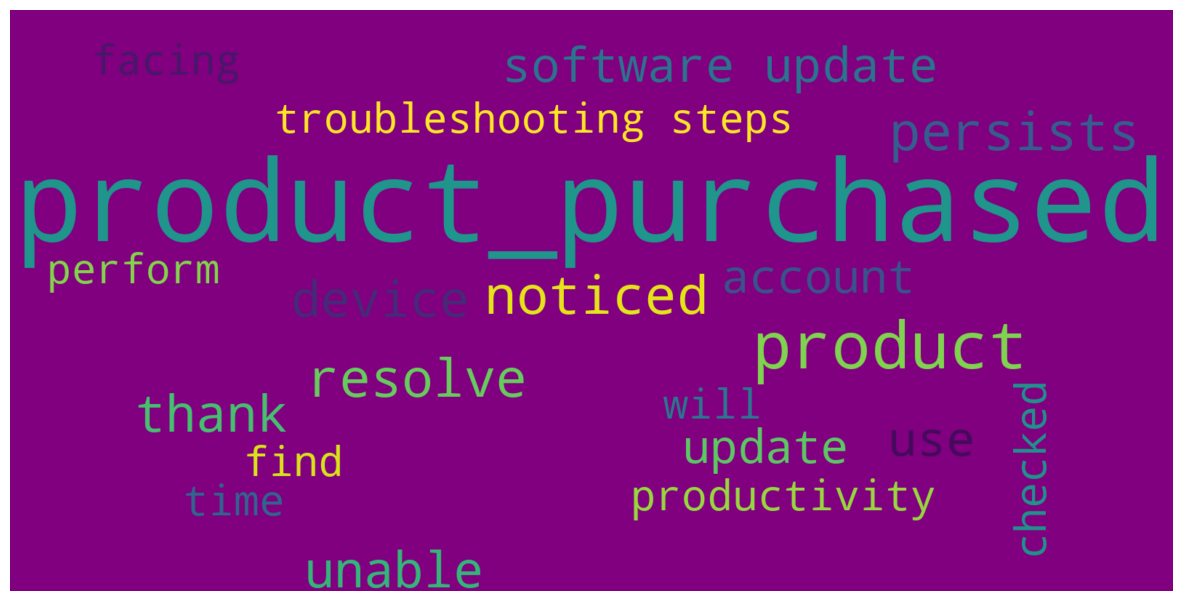

In [69]:
plt.figure(figsize = (15,15))
wc = WordCloud(background_color = "purple", stopwords = stop_words, max_words = 20, max_font_size = 300, width = 1600, height = 800)
wc.generate(word_string)

plt.imshow(wc.recolor(colormap = "viridis", random_state = 17), interpolation = "bilinear")
plt.axis("off")

11 - Ticket Status - Aqui podemos mapear os status dos tickets e identificar a quantidade aberta, fechada ou pendente de resposta.

11 - Ticket Status - Here we can map the ticket statuses identify the quantity open, closed or awaiting a response.

Primeiro, vamos gerar a informação que queremos saber.
Fist, let's generate the information we want to know.

In [70]:
Ptick = df.groupby("Ticket Status").size().reset_index(name = "Count")
Ptick["Percentage"] = (Ptick["Count"] / Ptick["Count"].sum()) * 100
print(Ptick)

               Ticket Status  Count  Percentage
0                     Closed   2769   32.695714
1                       Open   2819   33.286102
2  Pending Customer Response   2881   34.018184


Agora, vamos plotar um gráfico com essa informação para termos uma melhor visibilidade (como os dados estão muito normalizados da fonte, ajustei os limites do gráfico para mostrar a diferença mesmo que baixa).

Now, let's plot a chart with this information to have a better visibility (since the data is heavily normalized from the source, i adjusted the chart limits to show even the subtle differences).

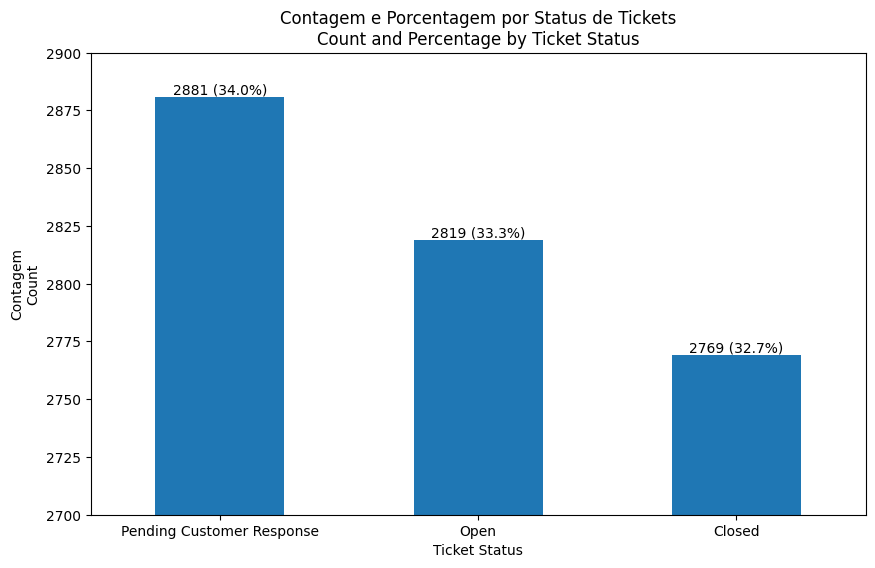

In [71]:
Ptick = Ptick.sort_values(by="Count", ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
Ptick.plot(x="Ticket Status", y="Count", kind="bar", ax=ax, legend=False)
ax.set_ylabel("Contagem\nCount")

for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / Ptick["Count"].sum() * 100:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

ax.set_ylim(2700, 2900)

plt.title("Contagem e Porcentagem por Status de Tickets\nCount and Percentage by Ticket Status")
plt.xticks(rotation=0)
plt.show()

12 - Resolution - Aqui podemos criar uma nuvem de palavras e tentar identificar a palavra que mais se destacou nas resoluções, podendo assim nos direcionar à possíveis soluções.

12 - Resolution - Here we can create a word cloud and try to identify the word that stood out the most in the resolutions, thus guiding us towards possible solutions.

Seguiremos os mesmos passos do item 10 (Ticket Description): Normalizar, plotar, identificar palavras para remover e plotar em definitivo.

We will follow the same steps as in item 10 (Ticket Description): Normalize, plot, identify words to remove, and plot for good.

(-0.5, 1599.5, 799.5, -0.5)

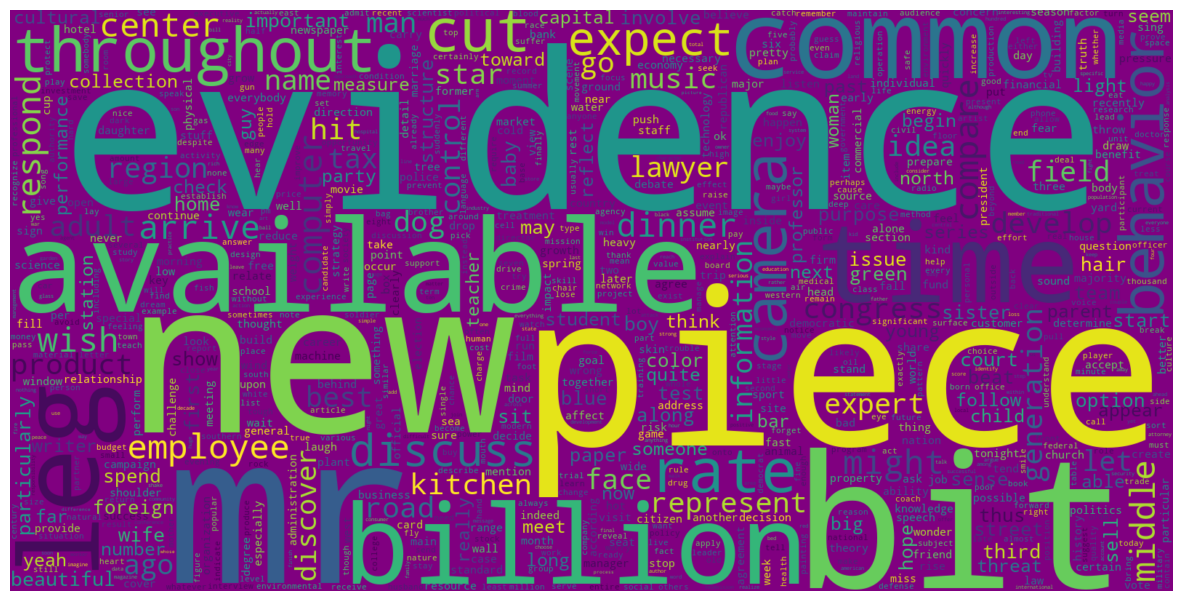

In [72]:
df["Resolution"] = df["Resolution"].fillna("")
word_string1 = " ".join(df["Resolution"].str.lower())

plt.figure(figsize = (15,15))
wc = WordCloud(background_color = "purple", stopwords = STOPWORDS, max_words = 2000, max_font_size = 300, width = 1600, height = 800)
wc.generate(word_string1)

plt.imshow(wc.recolor(colormap = "viridis", random_state = 17), interpolation = "bilinear")
plt.axis("off")

(-0.5, 1599.5, 799.5, -0.5)

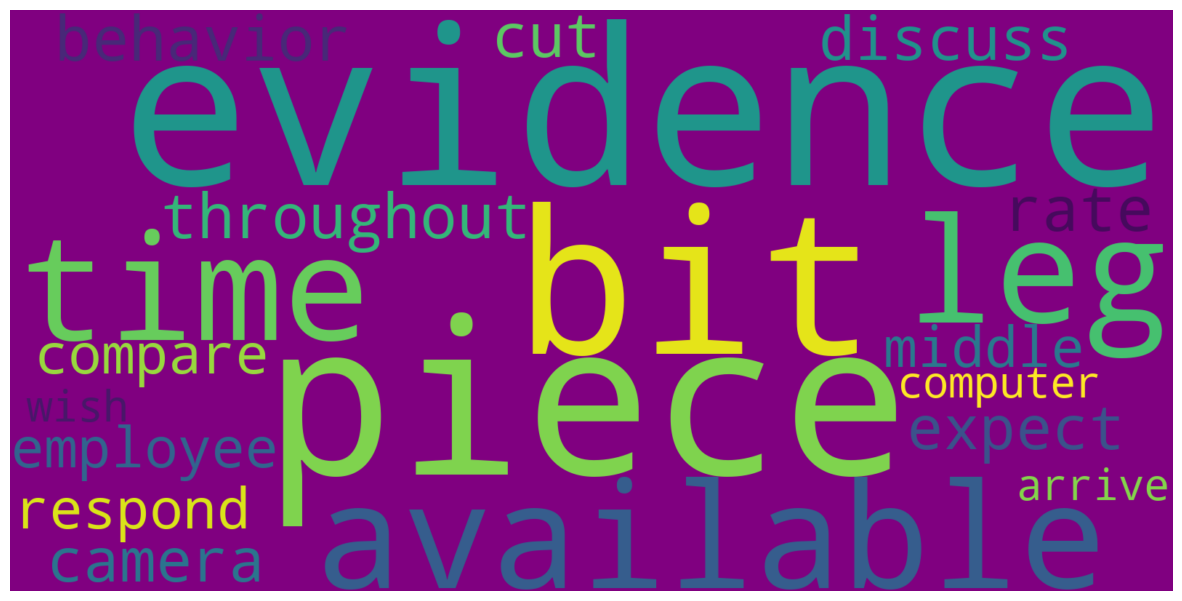

In [73]:
custom_stopwords1 = ["common", "billion", "new", "mr"]

stop_words = custom_stopwords1 + list(STOPWORDS)

plt.figure(figsize = (15,15))
wc = WordCloud(background_color = "purple", stopwords = stop_words, max_words = 20, max_font_size = 300, width = 1600, height = 800)
wc.generate(word_string1)

plt.imshow(wc.recolor(colormap = "viridis", random_state = 17), interpolation = "bilinear")
plt.axis("off")

13 - Ticket Priority - Aqui podemos mapear a prioridade como foi feito no item 11 (Ticket Status).

13 - Ticket Priority - Here we can map the priority like we did in item 11 (Ticket Status).

Vamos gerar a informação que queremos saber, depois podemos plotar o gráfico. (Lembrando do ajuste de visibidade para vermos melhor a diferença).

Let's generate the information we want to know, then we can plot the chart. (Remembering the adjust of the visibility for us too see better the difference).

In [74]:
Ppri = df.groupby("Ticket Priority").size().reset_index(name = "Count")
Ppri["Percentage"] = (Ppri["Count"] / Ppri["Count"].sum()) * 100
print(Ppri)

  Ticket Priority  Count  Percentage
0        Critical   2129   25.138741
1            High   2085   24.619199
2             Low   2063   24.359429
3          Medium   2192   25.882631


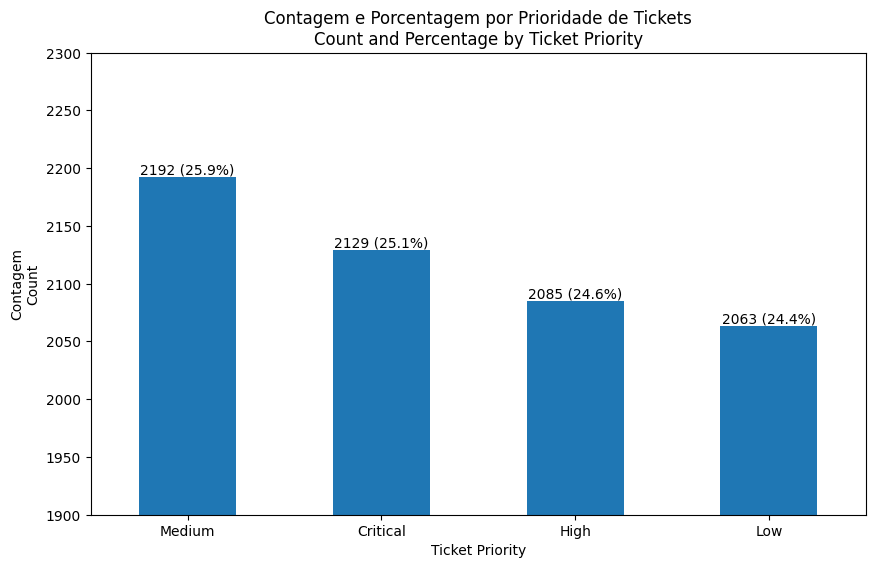

In [75]:
Ppri = Ppri.sort_values(by="Count", ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
Ppri.plot(x="Ticket Priority", y="Count", kind="bar", ax=ax, legend=False)
ax.set_ylabel("Contagem\nCount")

for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / Ppri["Count"].sum() * 100:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

ax.set_ylim(1900, 2300)

plt.title("Contagem e Porcentagem por Prioridade de Tickets\nCount and Percentage by Ticket Priority")
plt.xticks(rotation=0)
plt.show()

14 - Ticket Channel - Aqui trataremos igual o anterior.

14 - Ticket Channel - Here we will treat it the same as the previous one.

In [76]:
Pch = df.groupby("Ticket Channel").size().reset_index(name = "Count")
Pch["Percentage"] = (Ppri["Count"] / Ppri["Count"].sum()) * 100
print(Ppri)

  Ticket Priority  Count  Percentage
3          Medium   2192   25.882631
0        Critical   2129   25.138741
1            High   2085   24.619199
2             Low   2063   24.359429


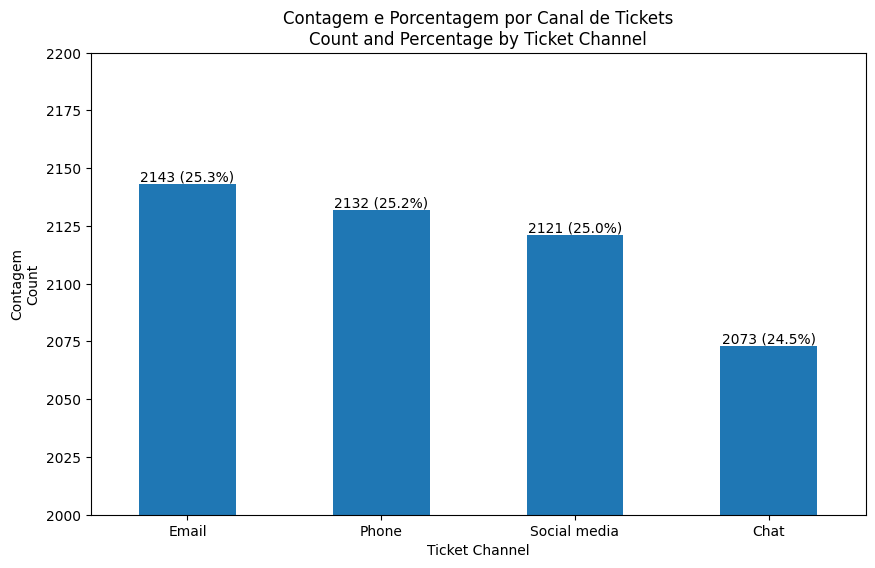

In [77]:
Pch = Pch.sort_values(by="Count", ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
Pch.plot(x="Ticket Channel", y="Count", kind="bar", ax=ax, legend=False)
ax.set_ylabel("Contagem\nCount")

for p in ax.patches:
    ax.annotate(f'{p.get_height()} ({p.get_height() / Pch["Count"].sum() * 100:.1f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

ax.set_ylim(2000, 2200)

plt.title("Contagem e Porcentagem por Canal de Tickets\nCount and Percentage by Ticket Channel")
plt.xticks(rotation=0)
plt.show()

15 - First Response Time - Aqui, a coluna por si só não nos trás informações interessantes, precisaríamos analisar em conjunto de outra, por isso iremos pular.

15 - First Response Time - Here, the column itself does not bring us interesting information, we would need to analyze it in conjunction with another one, so we will skip it.

16 - Time to Resolution - Mesmo caso da coluna anterior.

17 - Time to Resolution - Same case as the previous one.

17 - Customer Satisfaction Rating - 

17 - Customer Satisfaction Rating - 

In [78]:
df["Customer Satisfaction Rating"]

0       NaN
1       NaN
2       3.0
3       3.0
4       1.0
       ... 
8464    NaN
8465    NaN
8466    3.0
8467    3.0
8468    NaN
Name: Customer Satisfaction Rating, Length: 8469, dtype: float64